# COMP0123 Complex Networks and Webs Coursework 1

Importing libraries

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

## Task 0 - Preparation of Network Data

### Creating our Author Network

Creating our graph

In [2]:
G = nx.Graph()

Retrieving author indices if they have any interest related to social network

In [53]:
author_indices = []
interest = "social network"

with open("data/AMiner-Author.txt", 'r', encoding='utf-8') as f:
    current_author_index = None
    for line in f:
        if line.startswith("#index"):
            current_author_index = line.split(' ')[1]
        
        if line.startswith("#t"):
            interests = line[2:]
            # Check if any variant of the interest is in the author's interests.
            if interest in interests.lower():
                author_indices.append(current_author_index)

In [54]:
# Adding all author indices to the graph
G.add_nodes_from(author_indices)
G.number_of_nodes()

9219

If a link is between 2 authors already in our graph, we add it

In [55]:
# Adding in edges
edges = []

with open("data/AMiner-Coauthor.txt", 'r') as f:
    for line in f:
        author1, author2, _ = line.split()
        author1 = author1[1:]
        
        if (author1 in author_indices) and (author2 in author_indices):
            edges.append([author1, author2])
        

In [56]:
G.add_edges_from(edges)

12129

Filtering out any nodes with degree 0

In [57]:
F = nx.Graph()  
fedges = filter(lambda x: G.degree()[x[0]] > 0 and G.degree()[x[1]] > 0, G.edges())
F.add_edges_from(fedges)

Retrieving the largest component within our simple graph and ensuring we have 2,068 unique nodes and 5,163 unique links

In [70]:
# Achieving giant component
author_network = F.subgraph(max(nx.connected_components(F), key=len))

In [71]:
# Achieving desired number of nodes
author_network.number_of_nodes()

2068

In [72]:
# Achieving desired number of edges
author_network.number_of_edges()

5163

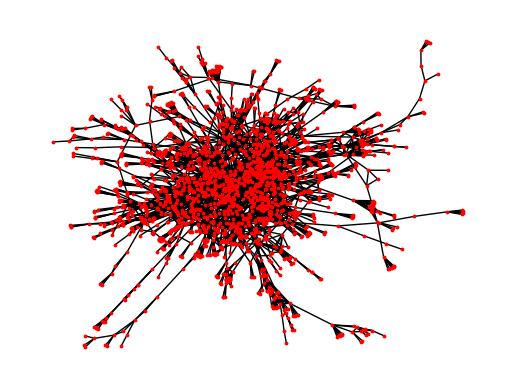

In [68]:
subax1 = plt.subplot()
options = {
    'node_color': 'red',
    'node_size': 3,
    'width': 1
}
nx.draw(author_network, **options)

### Generating Random Network